# Analysis of multi_game_experiment() in PA_01

### Imports

In [4]:
import plotly.express as px
from snakes_and_ladders import multi_game_experiment
import statistics as s
import pandas as pd
from matplotlib import pyplot as plt

### Create function to run experiment:

In [5]:
def experiment_results(num_games, num_players, seed):
    num_moves = multi_game_experiment(num_games, num_players, seed)
    return num_moves

### Run experiments with histogram:

In [18]:
num_moves_1 = multi_game_experiment(100, 1, 10)
num_moves_2 = multi_game_experiment(100, 2, 10)
num_moves_4 = multi_game_experiment(100, 4, 10)
num_moves_8 = multi_game_experiment(100, 8, 10)

all_moves = list(zip(num_moves_1, num_moves_2, num_moves_4, num_moves_8))

all_moves_df = pd.DataFrame(all_moves, columns=["one_player_moves", 
                                                "two_player_moves", 
                                                "four_player_moves", 
                                                "eight_player_moves"])

### Create histogram for experiments with Pyplot

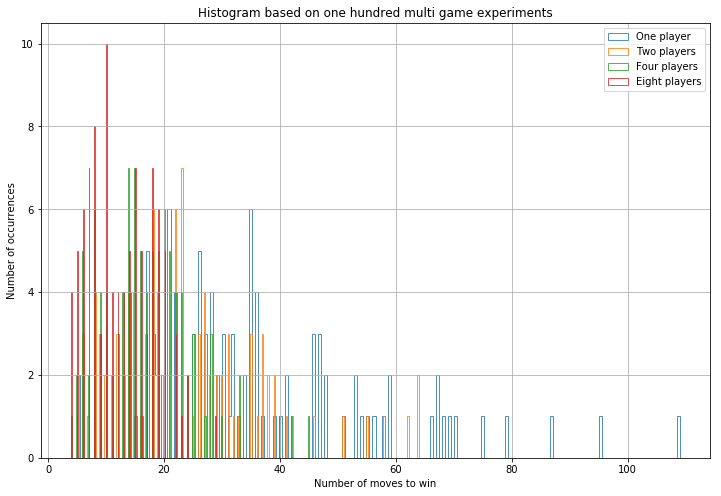

In [19]:
one_player = all_moves_df["one_player_moves"]
two_players = all_moves_df["two_player_moves"]
four_players = all_moves_df["four_player_moves"]
eight_players = all_moves_df["eight_player_moves"]

fig = plt.figure(figsize=(12,8))
plt.title("Histogram based on one hundred multi game experiments")
plt.xlabel("Number of moves to win")
plt.ylabel("Number of occurrences")

one_player.hist(alpha=0.8, bins=200, label='One player', histtype="step")
two_players.hist(alpha=0.8, bins=200, label='Two players', histtype="step")
four_players.hist(alpha=0.8, bins=200, label='Four players', histtype="step")
eight_players.hist(alpha=0.8, bins=200, label='Eight players', histtype="step")

plt.legend(loc="upper right")



## Creating interactive histograms with Plotly Express

In [20]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram(x=num_moves_1))
fig.add_trace(go.Histogram(x=num_moves_2))
fig.add_trace(go.Histogram(x=num_moves_4))
fig.add_trace(go.Histogram(x=num_moves_8))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=110)
fig.show()

